In [7]:
import pandas as pd

# Load the data, this is actually quasi RCT data, preprocessed in the script preprocessing.ipynb 
treated_RCT = pd.read_csv("treated_matched.csv")
control_RCT = pd.read_csv("control_matched.csv")

<Axes: title={'center': 'Performance_Score - treated'}, ylabel='Frequency'>

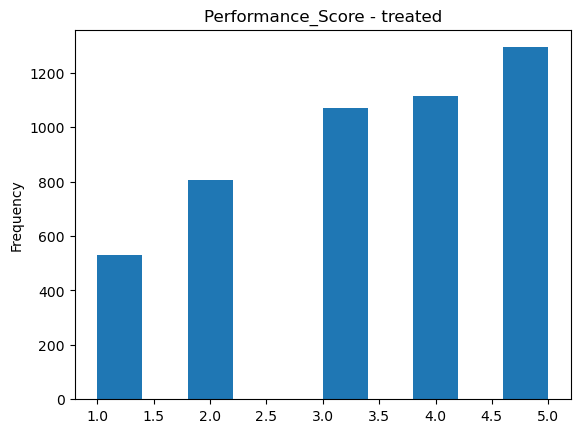

In [8]:
treated_RCT['Performance_Score'].plot(kind='hist', title='Performance_Score - treated')

<Axes: title={'center': 'Performance_Score - control'}, ylabel='Frequency'>

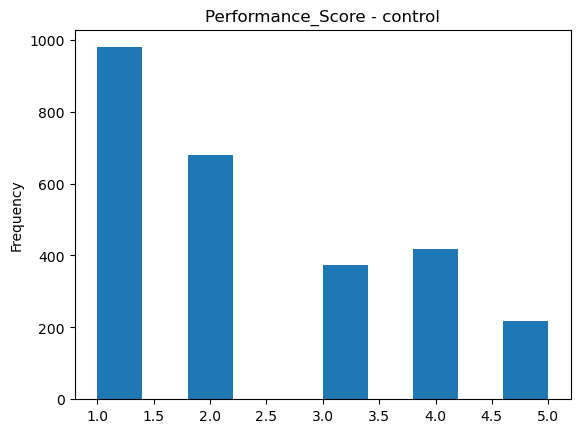

In [9]:
control_RCT['Performance_Score'].plot(kind='hist', title='Performance_Score - control')

**1 Determining Sample Size for a Chi-Square Test**

- **Importance of Sample Size**:
  - Ensures sufficient statistical power to detect true effects.
  - Prevents Type II errors (failing to detect an actual effect).

- **Factors Affecting Sample Size**:
  - **Effect Size (w)**: Larger expected differences require smaller samples. Standard benchmarks are $\text{small} = 0.1$, $\text{medium} = 0.3$, and $\text{large} = 0.5$.
  - **Significance Level ( $\alpha$)**: Commonly set to 0.05; smaller $\alpha$ increases required sample size.
  - **Power ($1-\beta$)**: Typically set at 0.8 or 0.9; higher power requires larger samples.

- **Chi-Square Test Sample Size Formula**:
  - The sample size $N$ can be approximated using the formula:
  $
  N = \frac{{(Z_{\alpha/2} + Z_{\beta})^2}}{{w^2}}
  $
  where:
  - $Z_{\alpha/2}$ is the critical value from the standard normal distribution for a two-tailed test with significance level $\alpha$.
  - $Z_{\beta}$ is the critical value for desired power ($1-\beta$).
  - $w$ is the effect size.

- **Steps to Calculate Sample Size**:
  1. **Define Effect Size w**: Based on expected proportions from pilot data or theory.
  2. **Set Alpha and Power**: Common choices are $\alpha = 0.05$ and power $1-\beta$ = 0.8 or 0.9.
  3. **Compute Sample Size N**: Substitute values into the formula using standard Z-tables or statistical software.


In [17]:
from scipy.stats import norm

# Significance level
alpha = 0.05
beta = 0.8
w = 0.1
# Calculate the Z_alpha value
Z_alpha2 = norm.ppf(1 - alpha/2)
Z_beta = norm.ppf(1 - beta)

N = ((Z_alpha2 + Z_beta)**2)/w**2

print(f"The minimal sample number per class is: ", N)

The minimal sample number per class is:  125.06905086407498


In [15]:
print("Amount of samples in treatment group: ", treated_RCT.shape[0])
print("Amount of samples in control group: ", control_RCT.shape[0])

Y_1 = treated_RCT['High_Performance'].apply(lambda x: 1 if x >= 1 else 0).mean()
print("The average of higher performance in the treatment group is: ", Y_1)
Y_0 = control_RCT['High_Performance'].apply(lambda x: 1 if x >= 1 else 0).mean()
print("The average of higher performance in the control group is: ", Y_0)

print("The average treatment effect (ATE) is: ", Y_1 - Y_0)

Amount of samples in treatment group:  4814
Amount of samples in control group:  2667
The average of higher performance in the treatment group is:  0.5002077274615704
The average of higher performance in the control group is:  0.23809523809523808
The average treatment effect (ATE) is:  0.2621124893663323


### Chi-Square Test of Independence
- **Purpose**: To statistically test if there's a significant association between the intervention and outcome.
- **Hypotheses**:
  - **Null Hypothesis ($H_0$)**: The intervention has no effect on the outcome. The distribution of productivity improvement is the same for both groups.
  - **Alternative Hypothesis ($H_a$)**: The intervention has an effect on the outcome. The distribution of productivity improvement differs between the groups.

In [16]:
# Perform the chi-square test on the matched sample to assess the impact of education level on performance.
matched_dataset = pd.concat([control_RCT, treated_RCT], axis=0)

from scipy.stats import chi2_contingency
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(matched_dataset['High_Salary'], matched_dataset['High_Performance'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print("Degrees of freedom: ", dof)
#print("Expected frequency: ", ex)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

# Calculate the critical value using the percent point function (inverse of cdf)
critical_value = stats.chi2.ppf((1 - alpha/2), dof)

print(f"Critical value at {alpha/2} significance level: {critical_value}")

if (chi2 > critical_value):
    print(f"Reject H_0 with p={p} -> that means the causal effect is significant with alpha level {alpha/2}.")
else:
    print("Can not reject H_0!")

Degrees of freedom:  1
Chi-square statistic: 487.5385431021745, p-value: 4.891024337569181e-108
Critical value at 0.005 significance level: 7.879438576622416
Reject H_0 with p=4.891024337569181e-108 -> that means the causal effect is significant with alpha level 0.005.


- **Conclusion**:
  - If $ \chi^2 $ statistic > critical value: Reject $H_0$. There is a significant impact of the intervention.
  - If $ \chi^2 $ statistic <= critical value: Do not reject $H_0$. No significant impact detected.


### Limitations and Considerations
- **Assumptions**: The chi-square test assumes large sample sizes and expected frequencies of at least 5 for each cell.
- **Causality**: While statistical significance is important, consider the practical significance and context to infer causality.
- **Confounding Variables**: Other unseen factors might influence the outcomes; careful experiment design or additional statistical control is required.